In [30]:
import pandas as pd
import numpy as np

In [31]:
data = pd.read_csv('bank.csv', delimiter=";")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [32]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

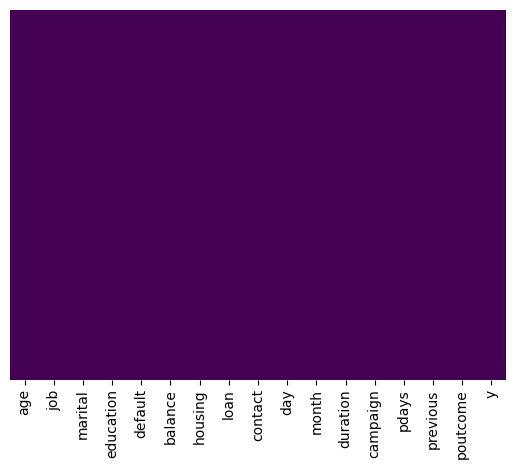

In [35]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

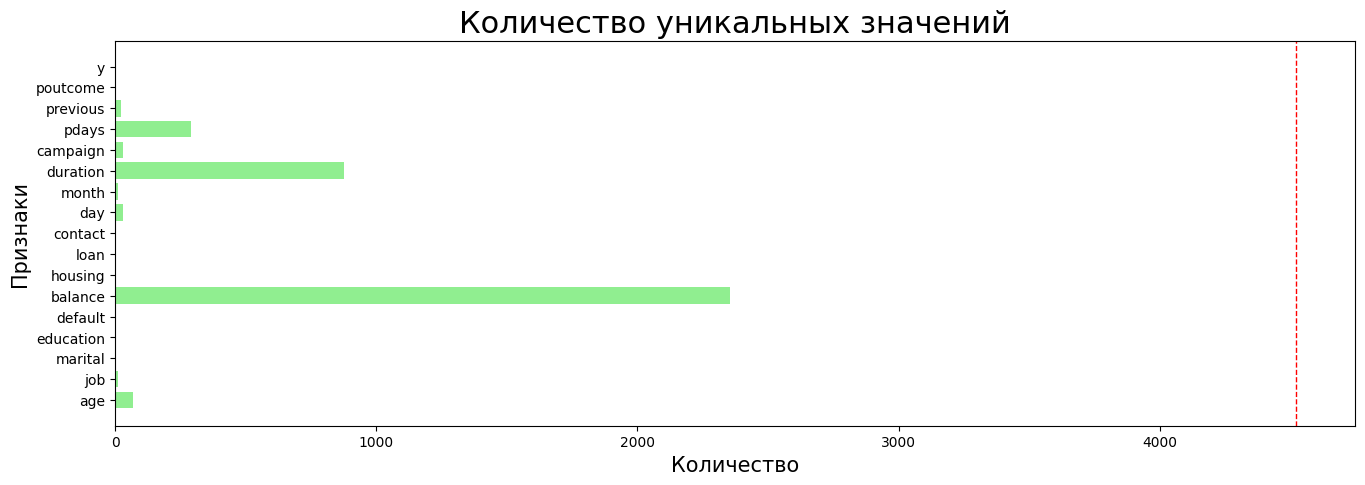

In [36]:
fig = plt.figure(figsize=(16,5))
ax=fig.subplots()
ax.axvline(x=data.shape[0], color='r', label='Average', linestyle='--', linewidth=1)
plt.barh(data.columns, data.nunique(), align='center',color='lightgreen')
plt.title("Количество уникальных значений", fontsize=22)
plt.xlabel('Количество', fontsize=15)
plt.ylabel('Признаки', fontsize=15)
plt.show()

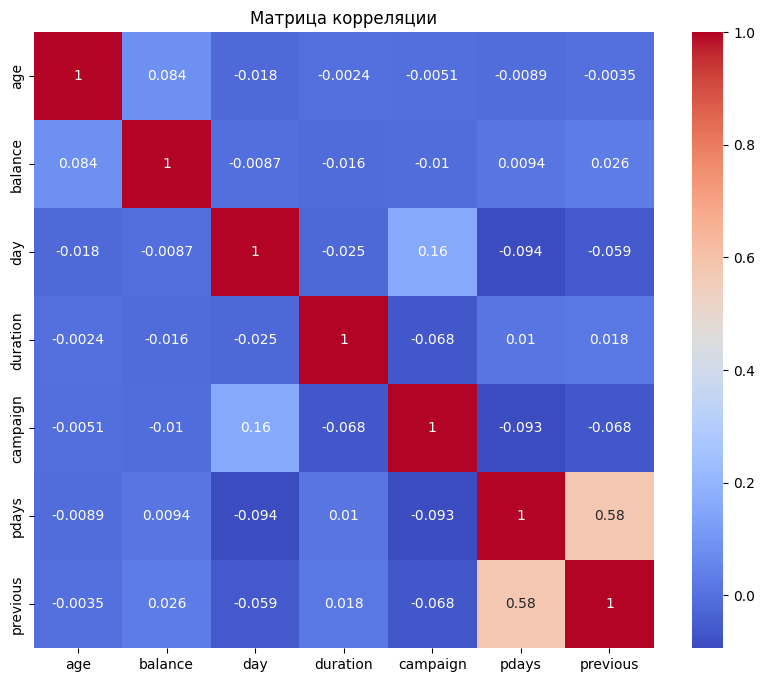

In [37]:
correlation_matrix = data.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

In [38]:
def custom_hist(training_set, title,  xlabel, ylabel='Количество', bins=None):
    figsize = (20,6)
    plt.figure(figsize=figsize)
    plt.grid(True)
    plt.title(title)
    plt.hist(training_set, training_set.max().astype(training_set.dtype) if bins is None else bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

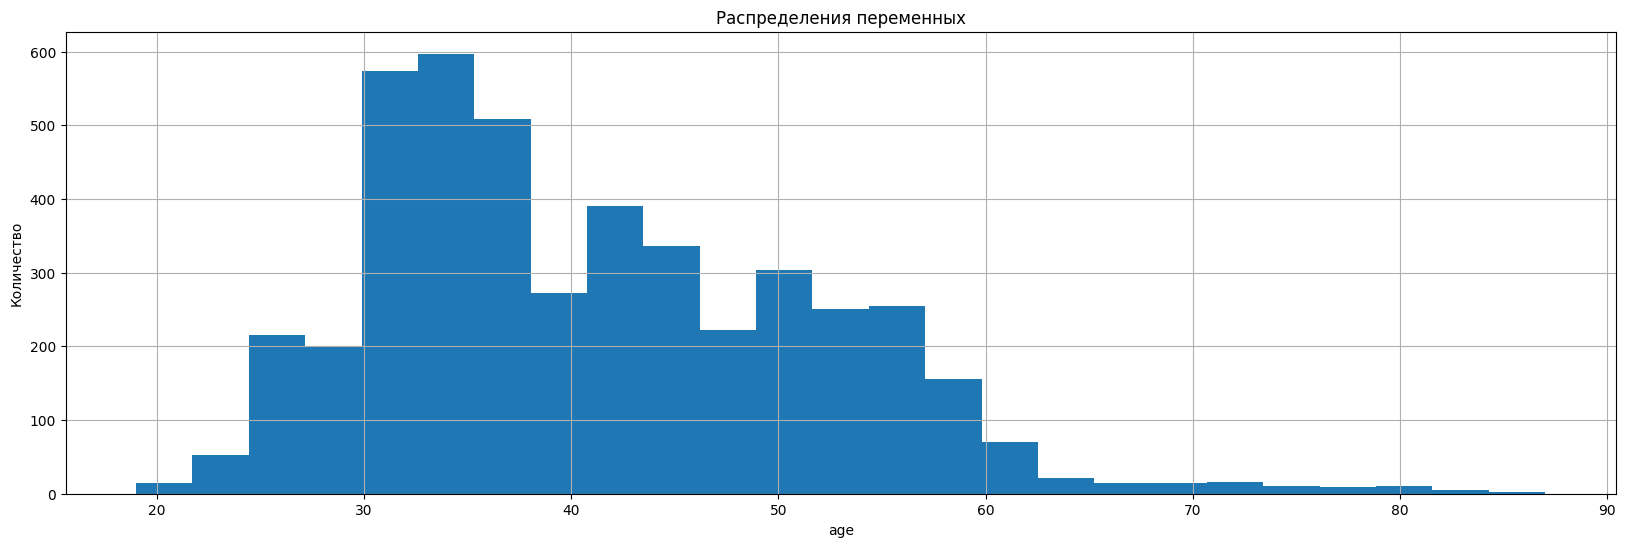

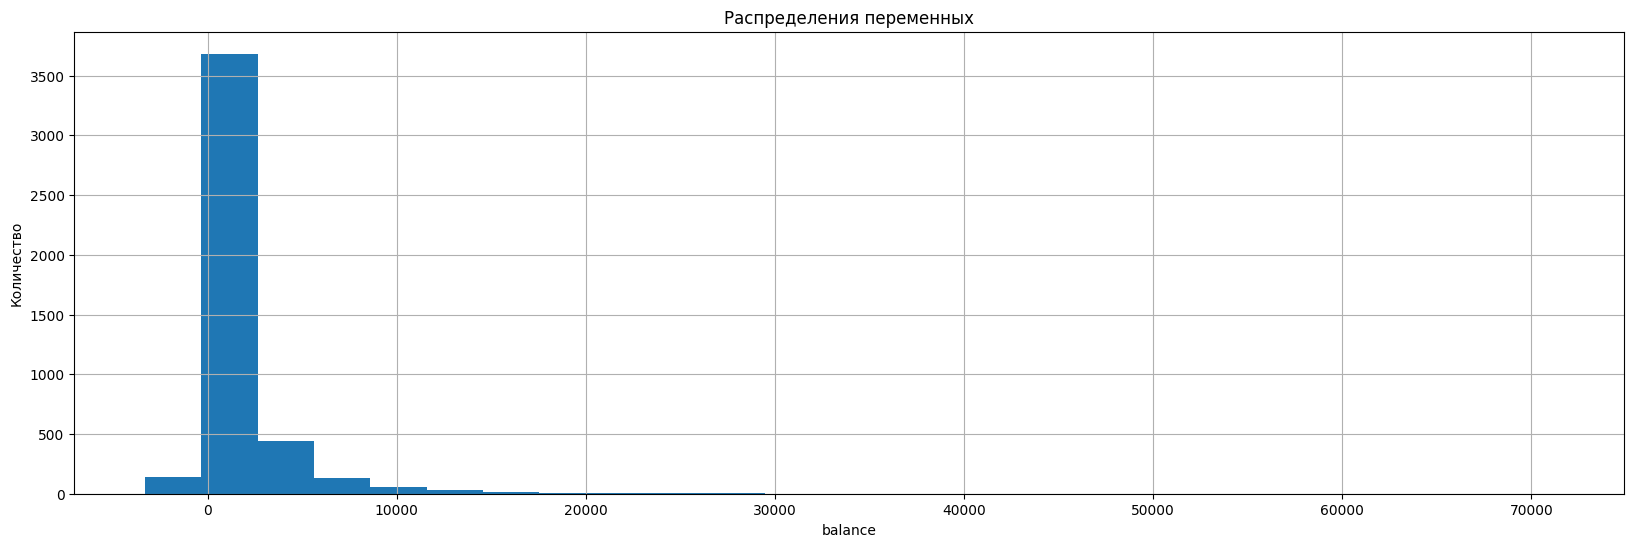

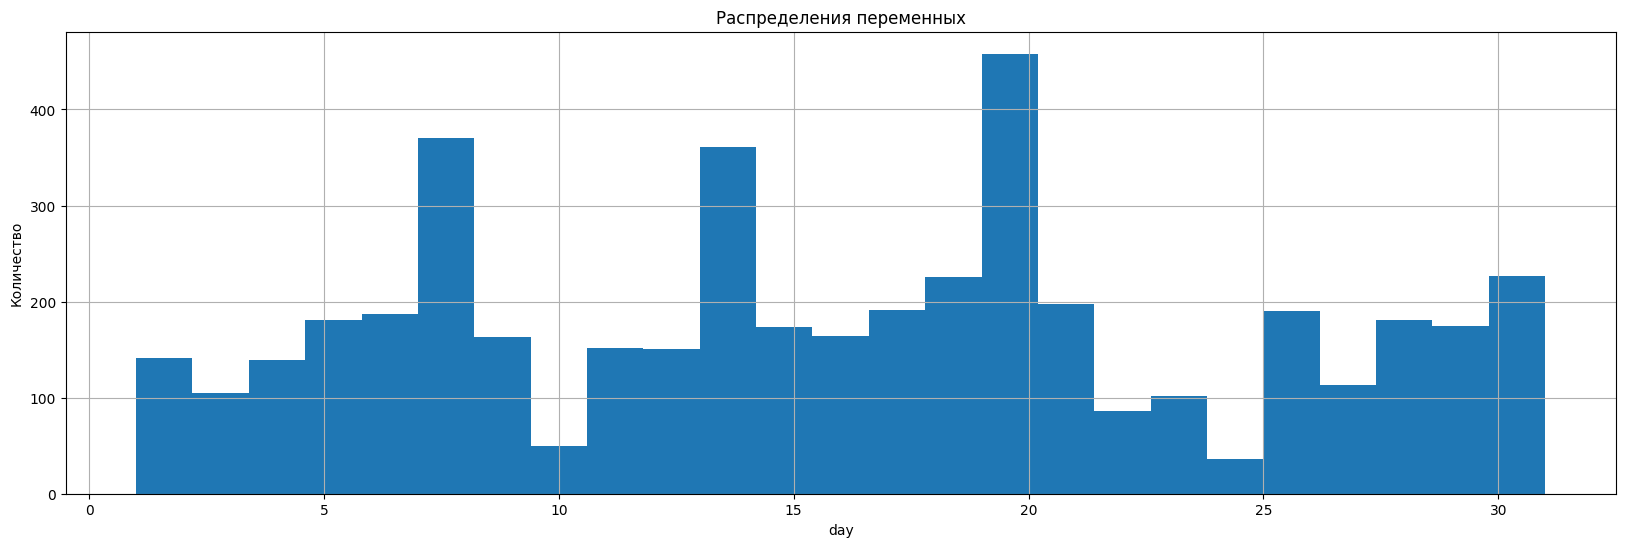

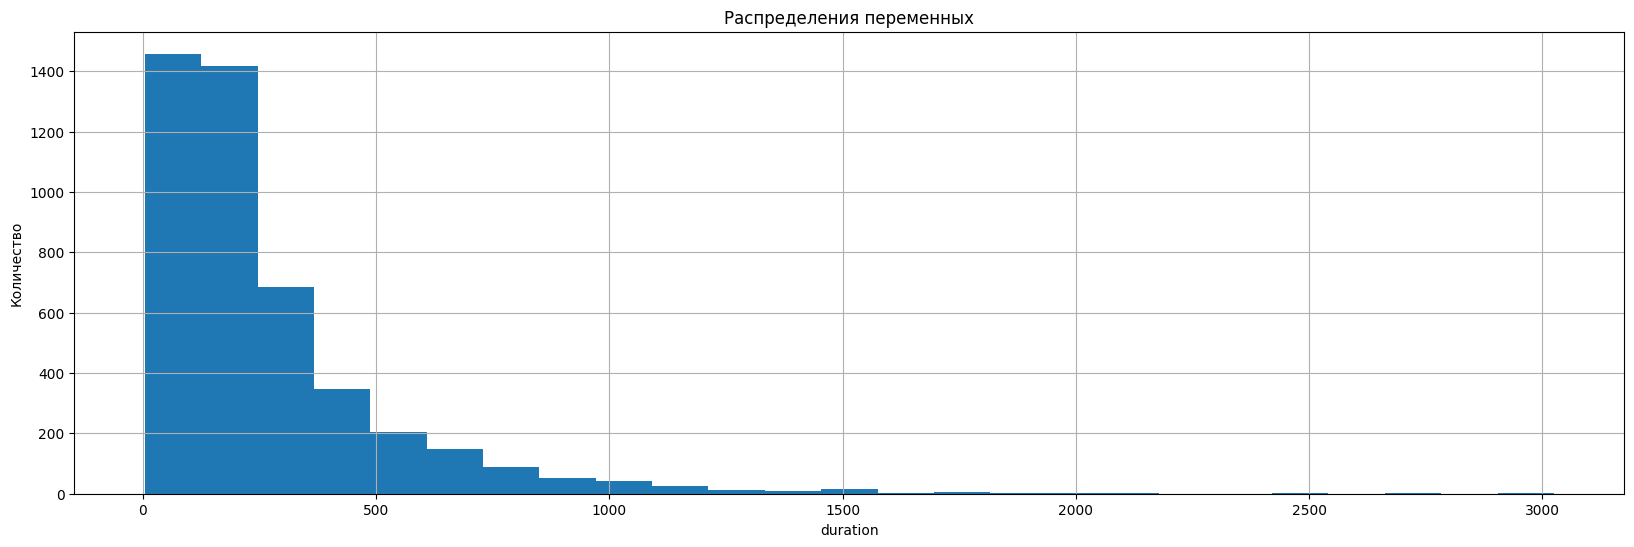

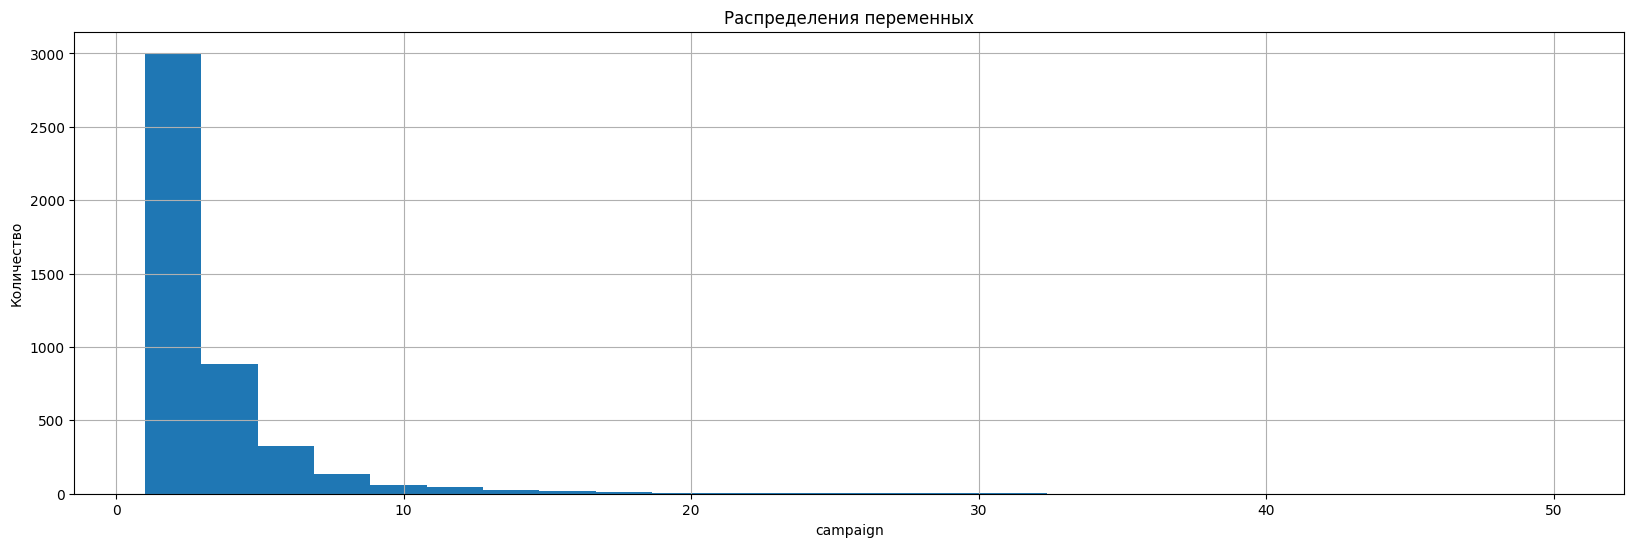

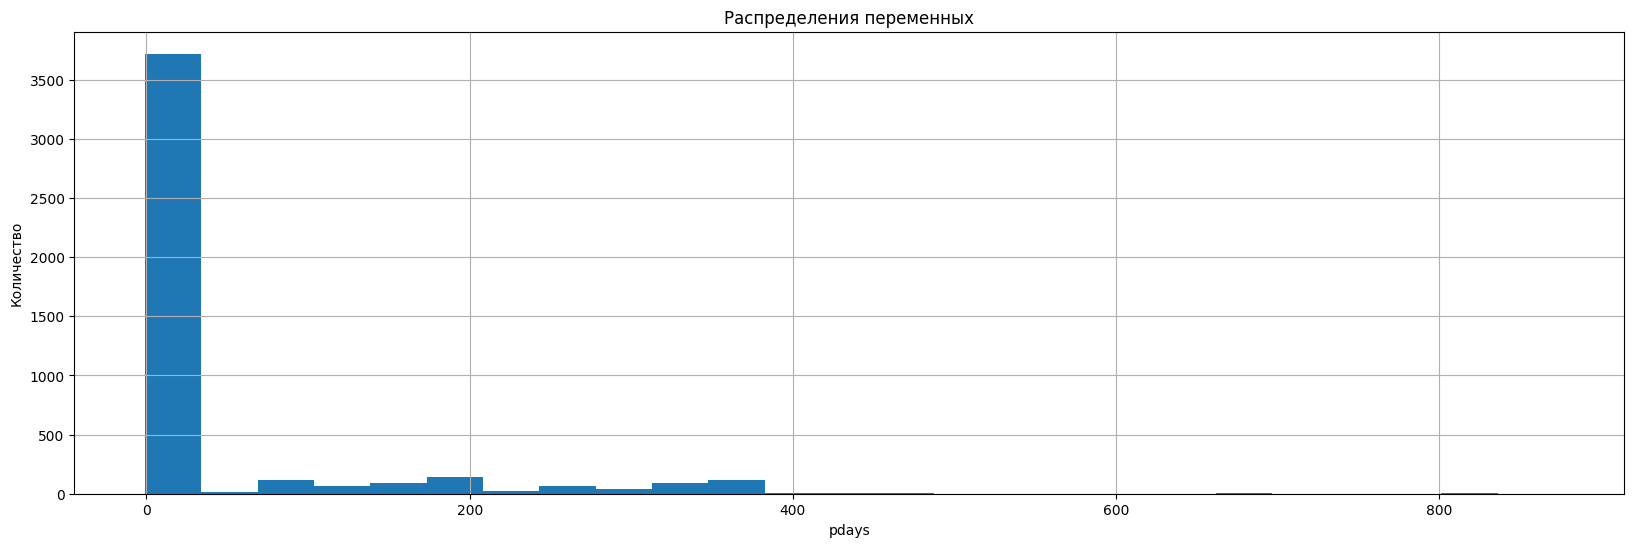

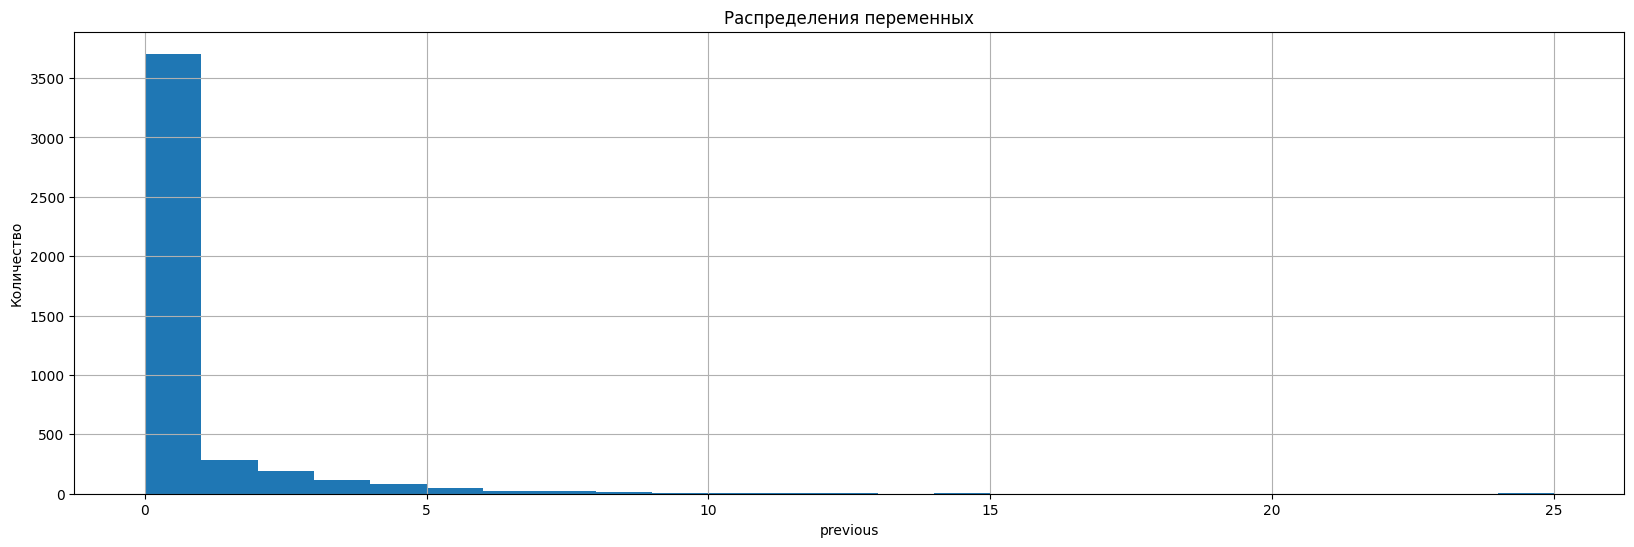

In [39]:
for i in data.columns:
    if data[i].dtype!='object':
        custom_hist(data[i], 'Распределения переменных', i, bins=25)

In [40]:
def info(column):
    plt.title(str(column))
    ax = sns.barplot(x=data[column].value_counts().index, y=data[column].value_counts())
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
    plt.show()

/tmp/ipython-input-3753224777.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


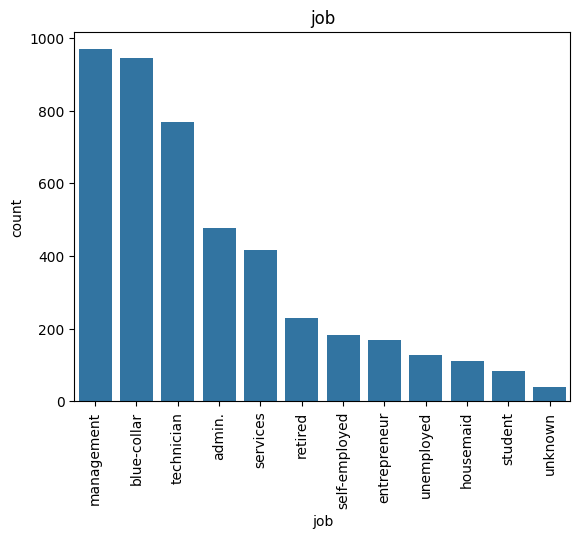

/tmp/ipython-input-3753224777.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


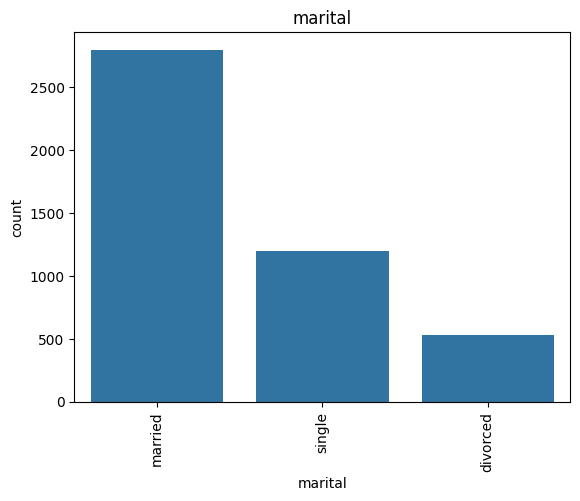

/tmp/ipython-input-3753224777.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


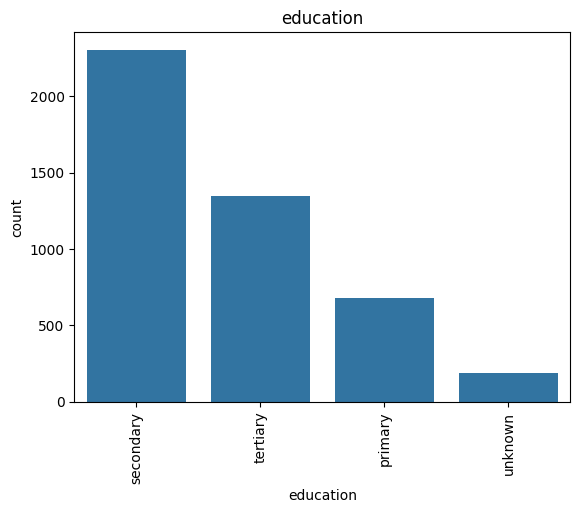

/tmp/ipython-input-3753224777.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


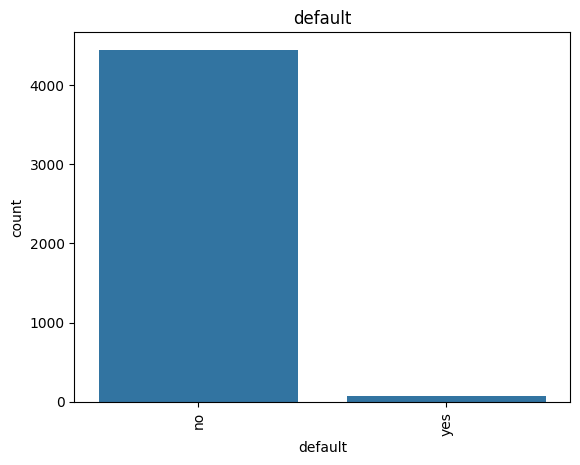

/tmp/ipython-input-3753224777.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


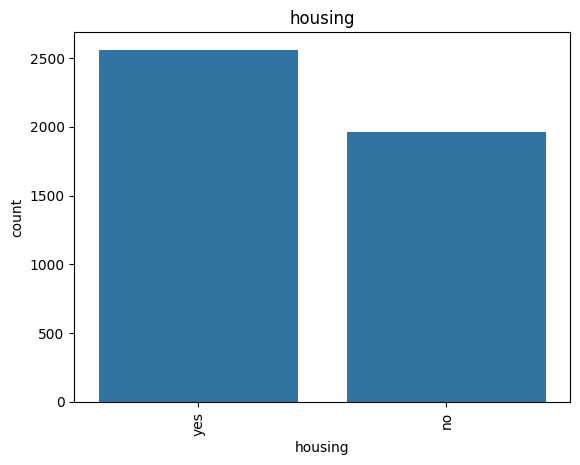

/tmp/ipython-input-3753224777.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


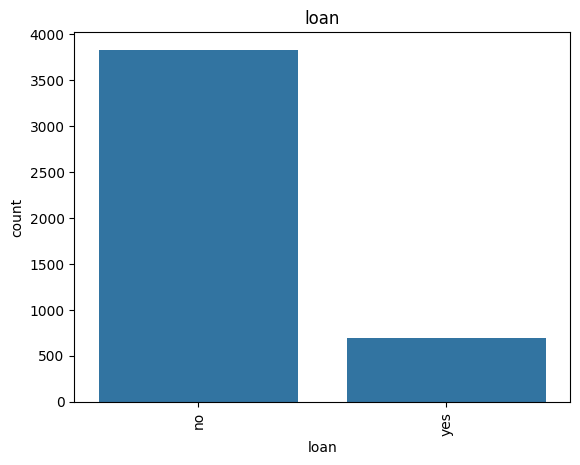

/tmp/ipython-input-3753224777.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


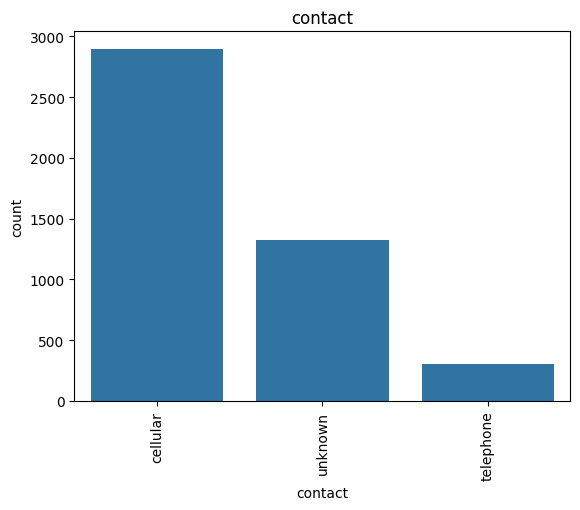

/tmp/ipython-input-3753224777.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


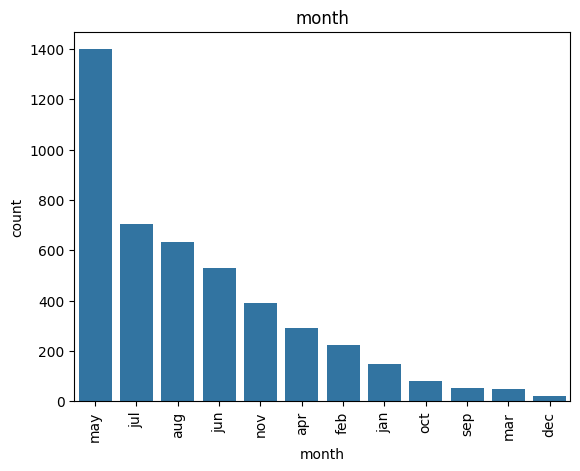

/tmp/ipython-input-3753224777.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


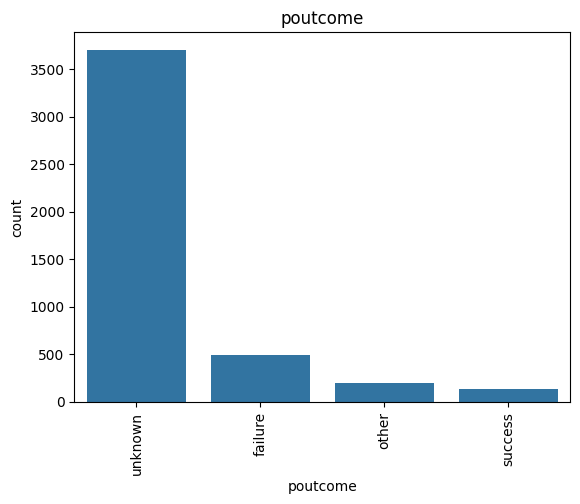

/tmp/ipython-input-3753224777.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


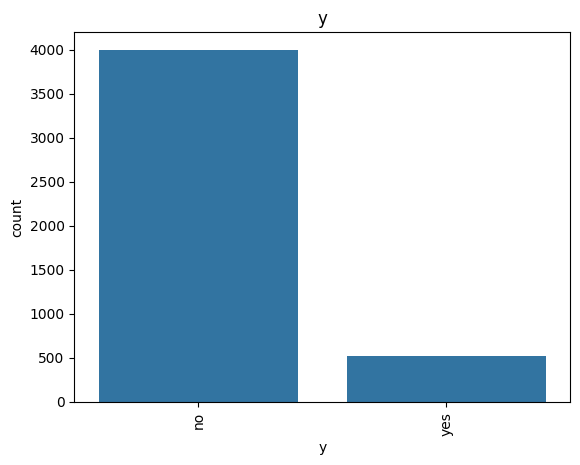

In [41]:
for column in data.columns:
    if data[column].dtype == 'object':
        info(column)

In [42]:
# data = data.drop('Loan_ID', axis = 1)
#data = data.dropna()
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [43]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [44]:
ohe = OneHotEncoder()

for i in data.columns:
    if data[i].dtype == 'object' and i != 'y':
        data[i] = data[i].fillna('null'+i)
        transformed = ohe.fit_transform(data[[i]])
        data[ohe.categories_[0]] = transformed.toarray()
        data = data.drop(i, axis = 1)
data

,age,balance,day,duration,campaign,pdays,previous,y,admin.,blue-collar,...,jul,jun,mar,may,nov,oct,sep,failure,other,success
0,30,1787,19,79,1,-1,0,no,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,33,4789,11,220,1,339,4,no,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,35,1350,16,185,1,330,1,no,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,30,1476,3,199,4,-1,0,no,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,59,0,5,226,1,-1,0,no,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,no,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4517,57,-3313,9,153,1,-1,0,no,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4518,57,295,19,151,11,-1,0,no,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4519,28,1137,6,129,4,211,3,no,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


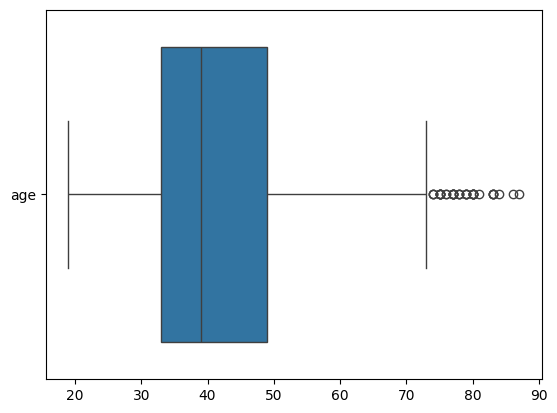

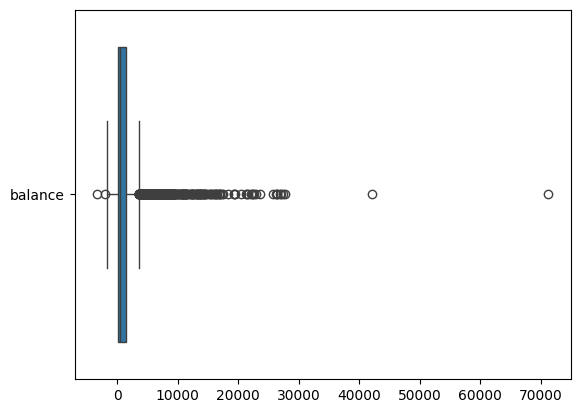

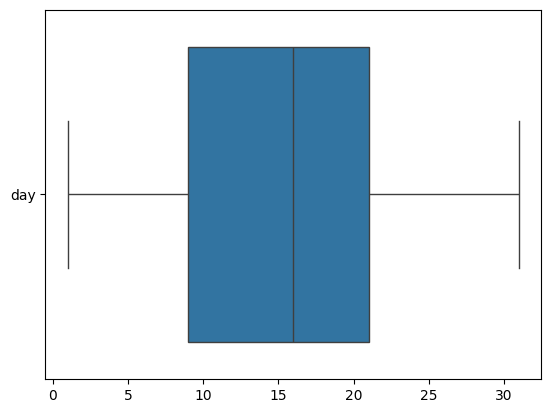

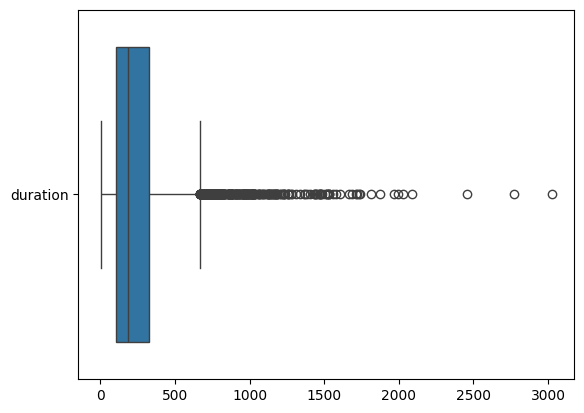

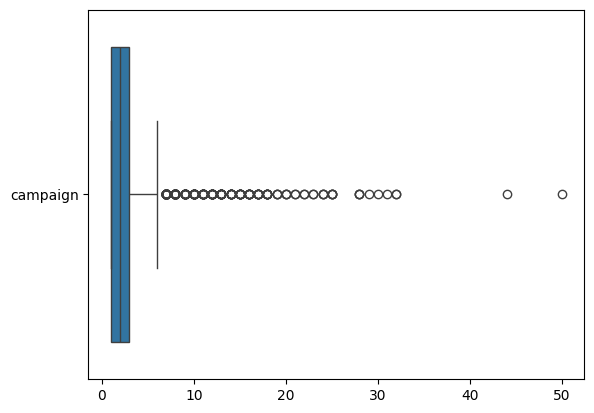

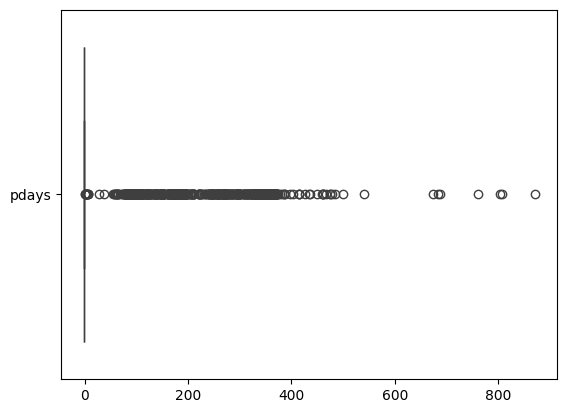

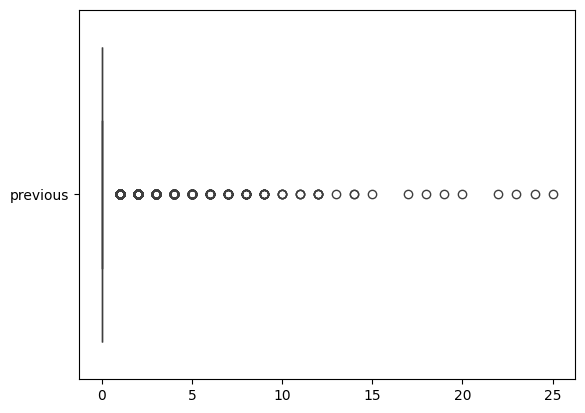

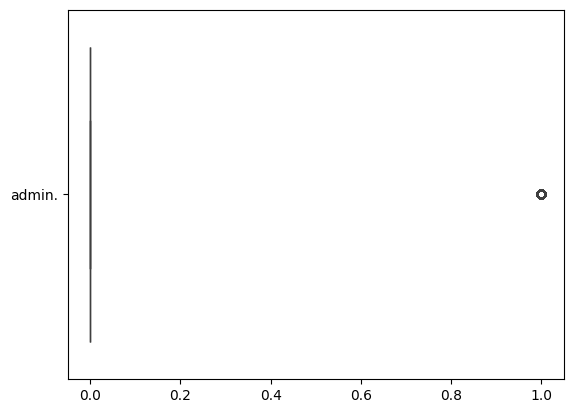

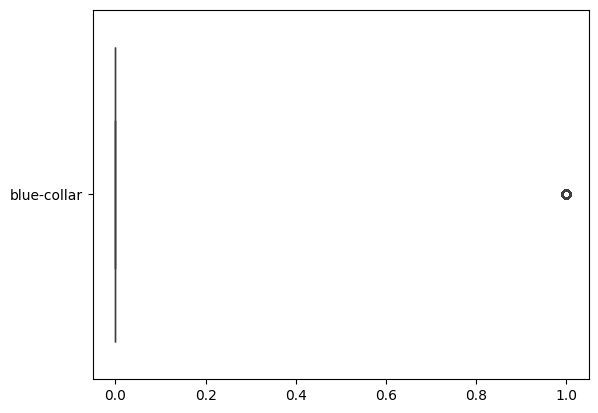

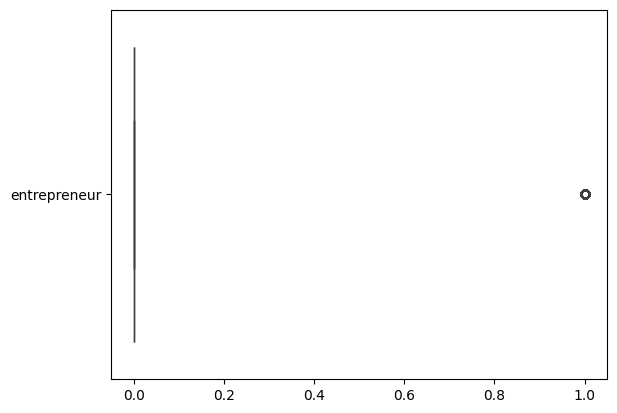

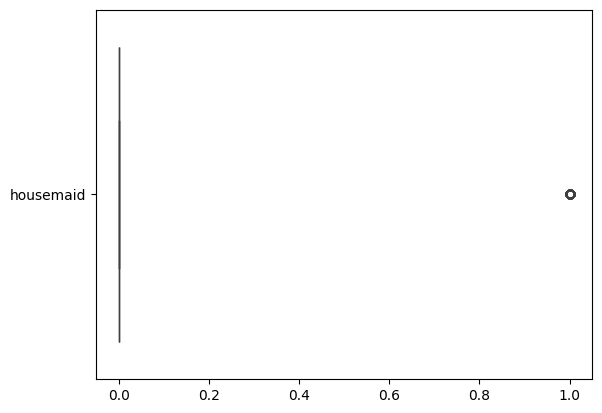

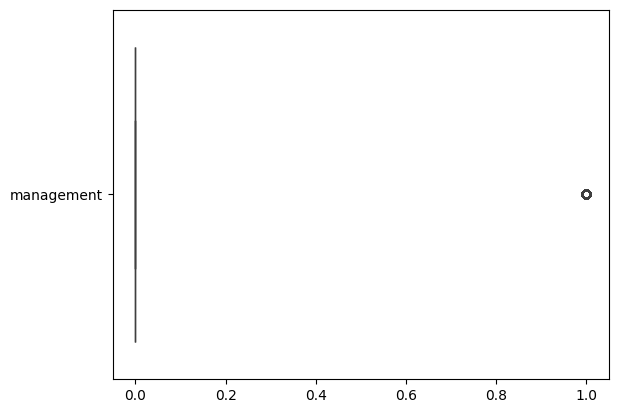

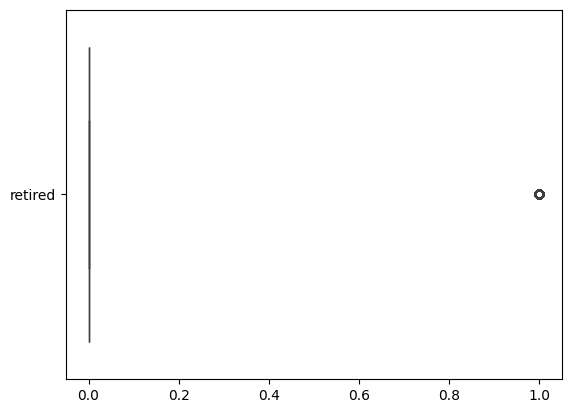

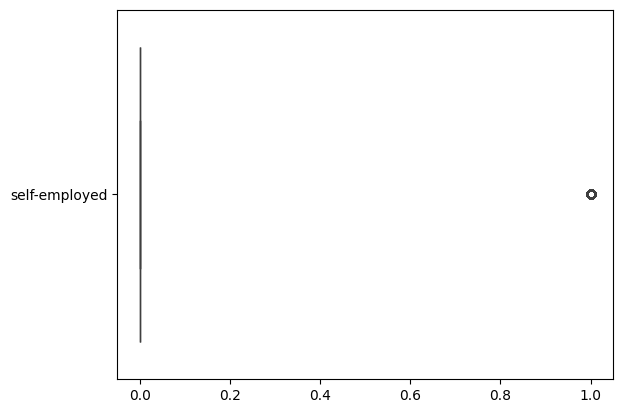

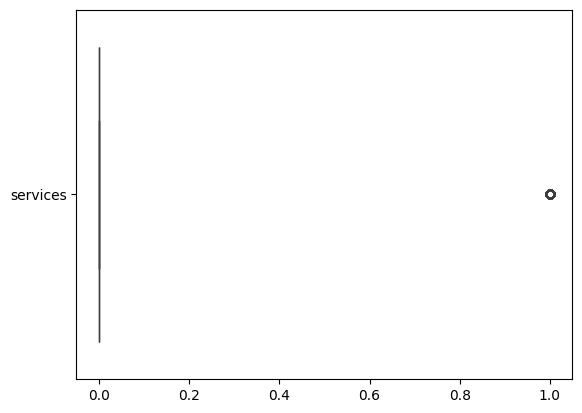

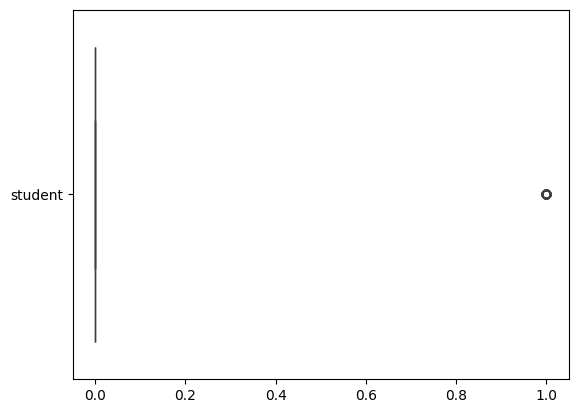

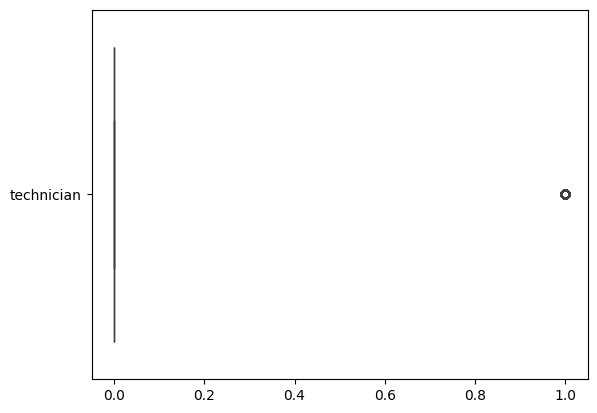

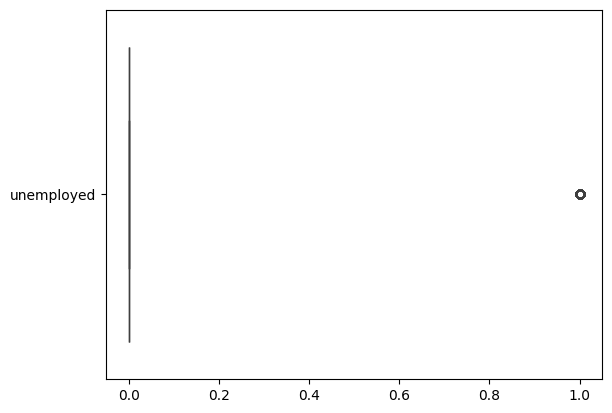

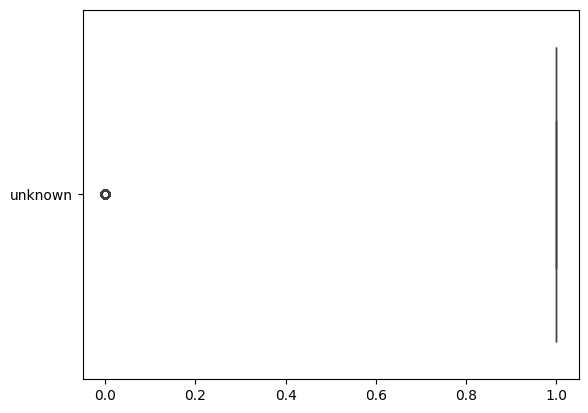

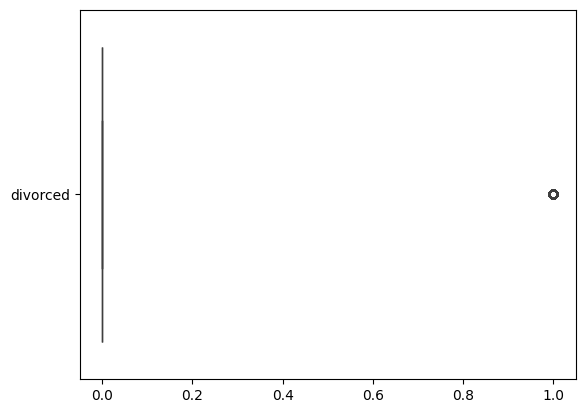

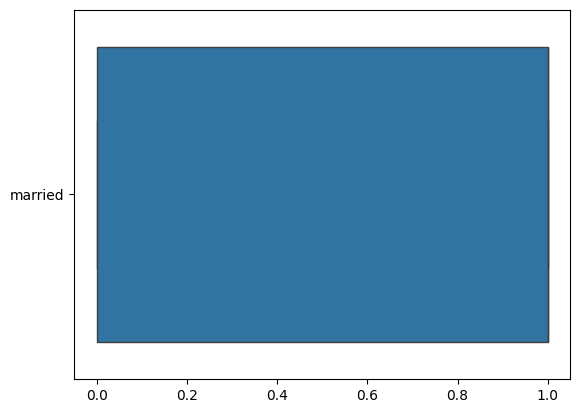

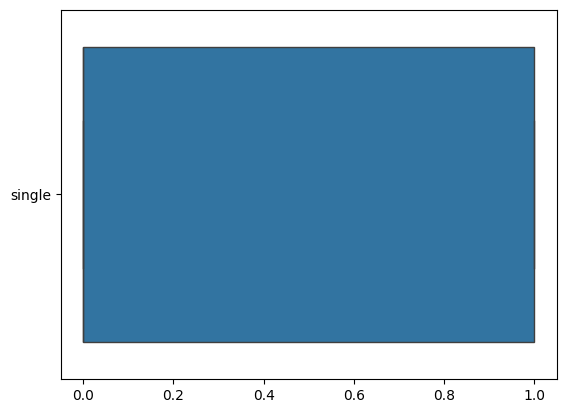

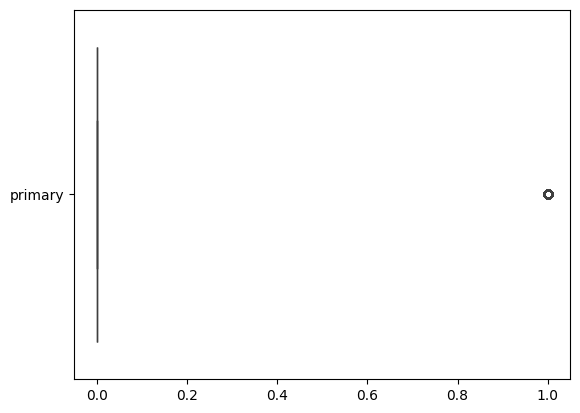

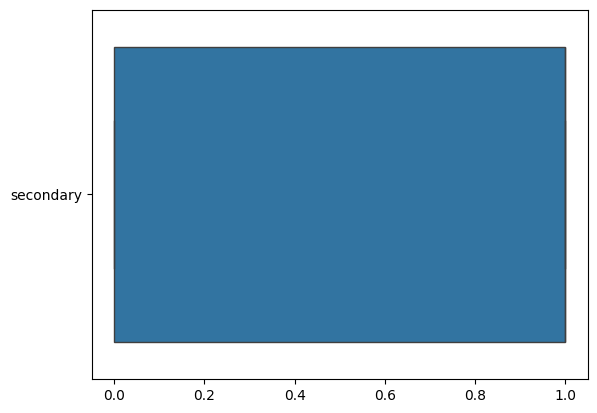

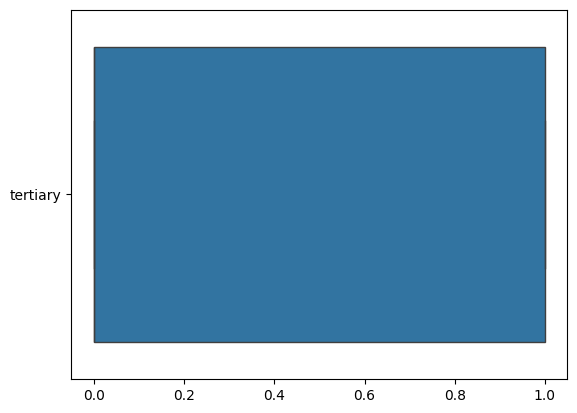

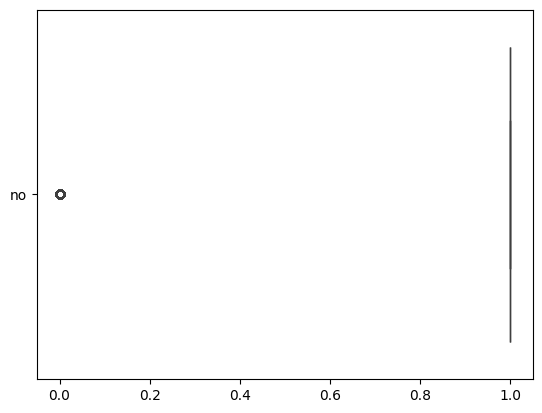

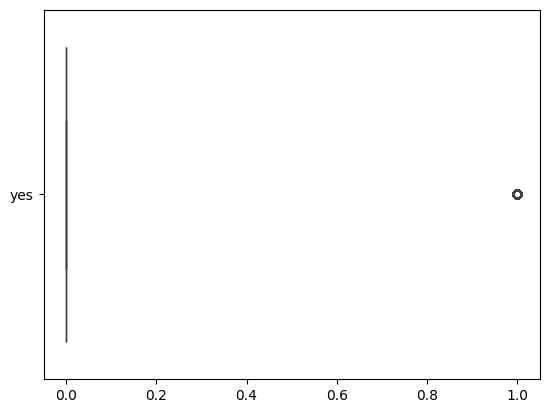

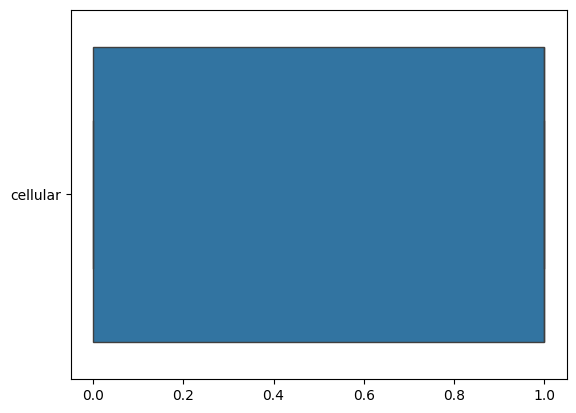

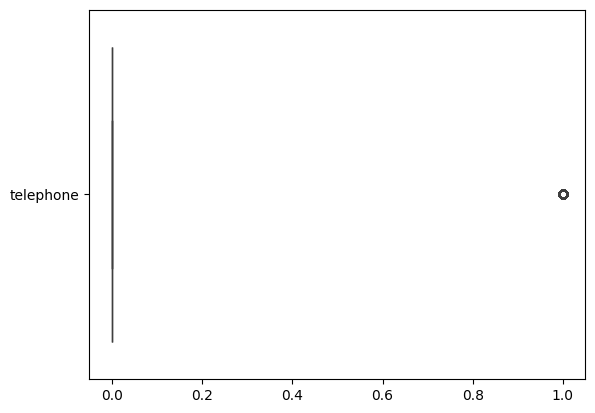

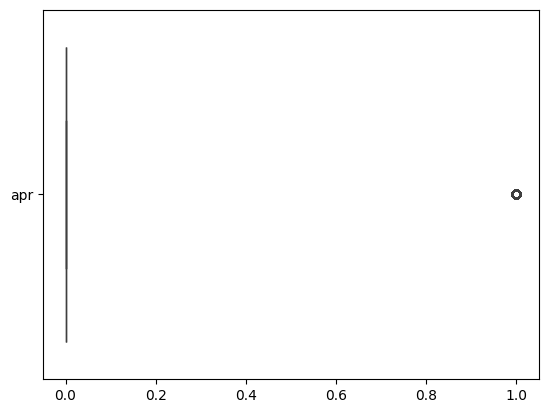

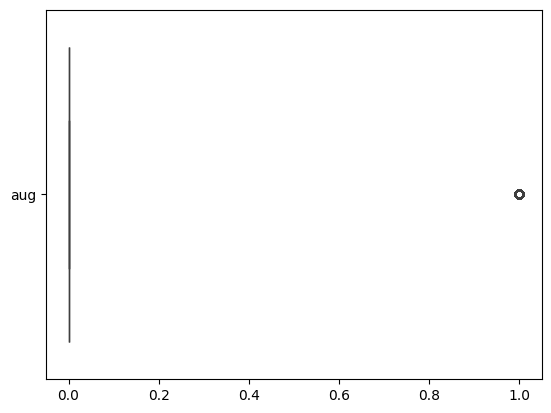

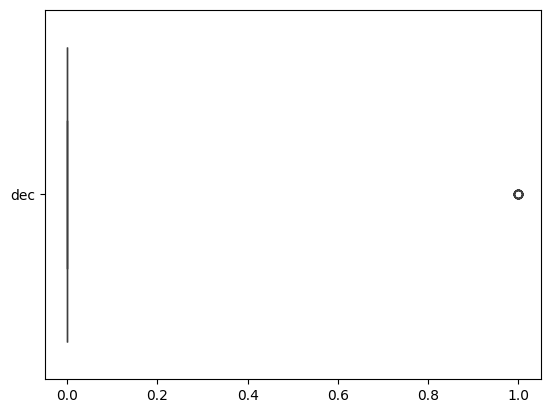

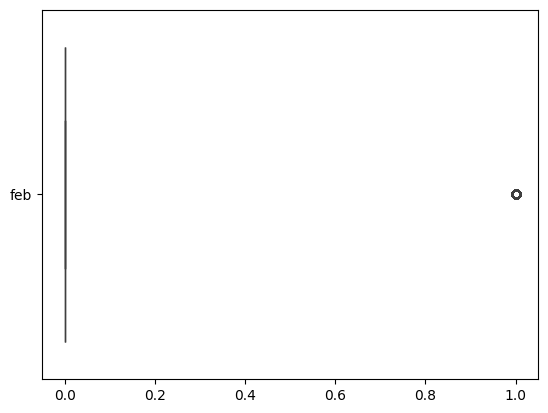

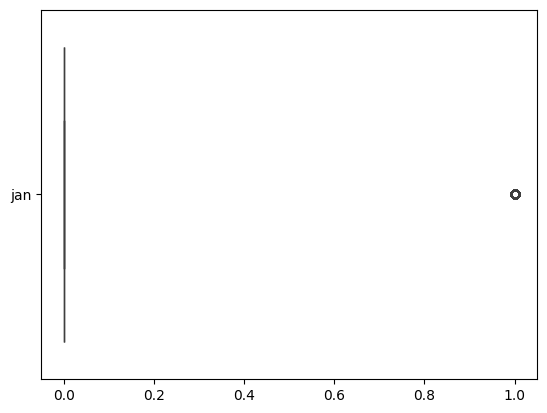

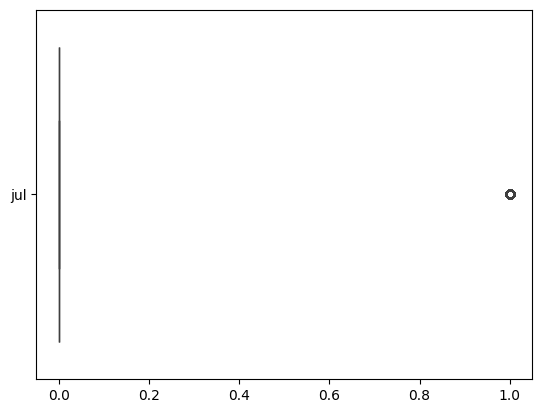

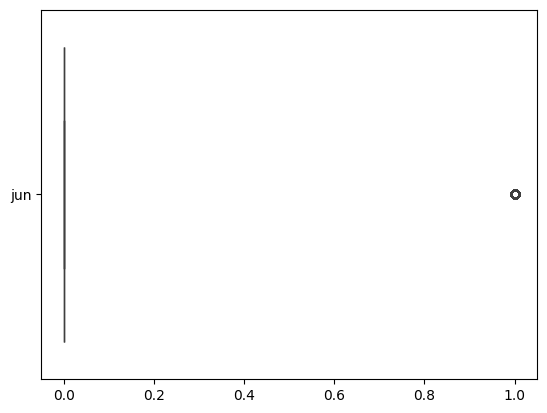

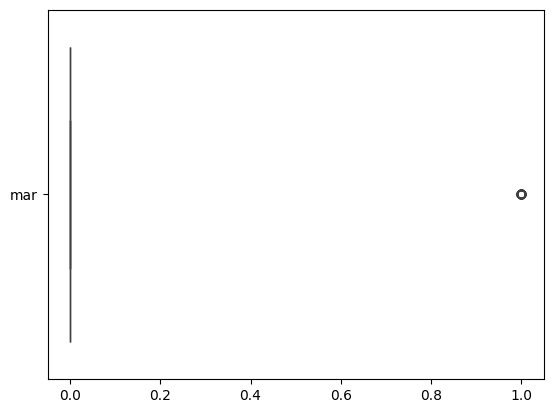

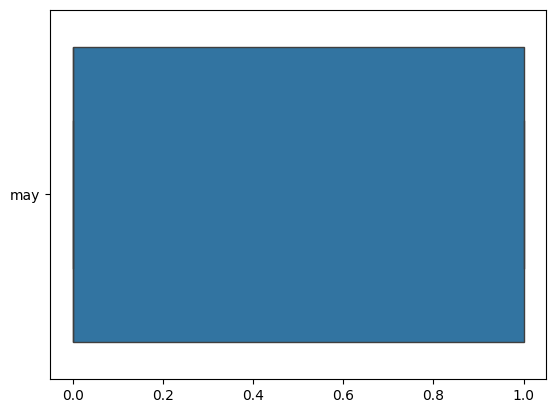

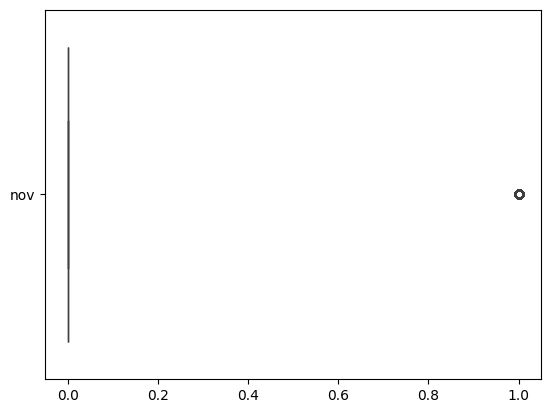

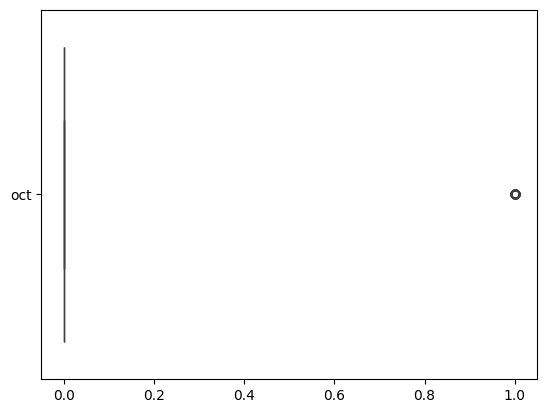

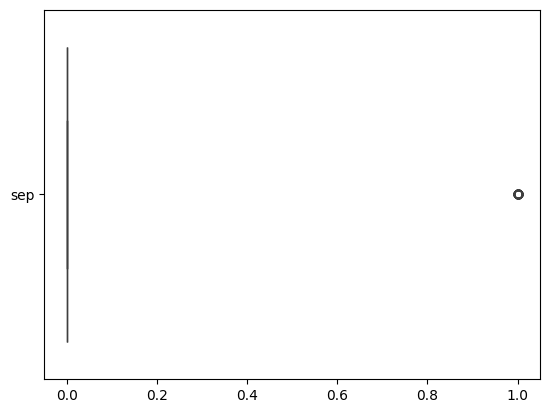

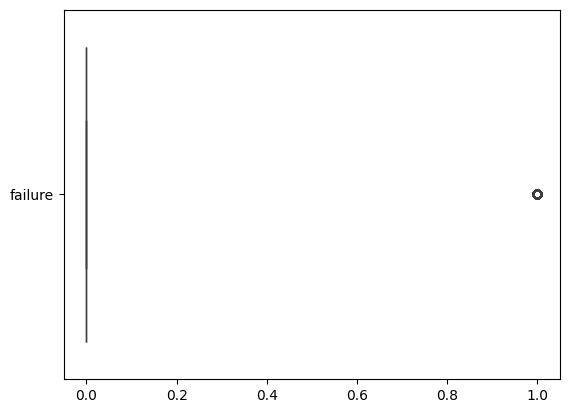

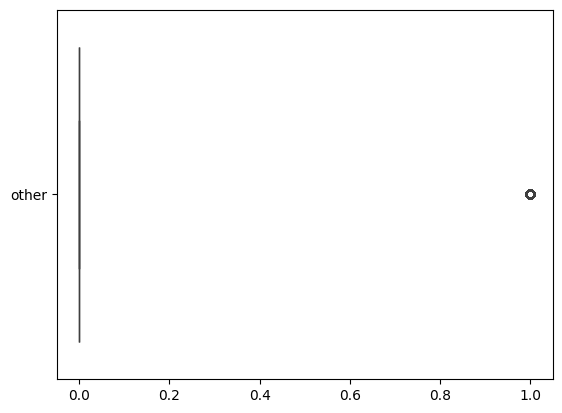

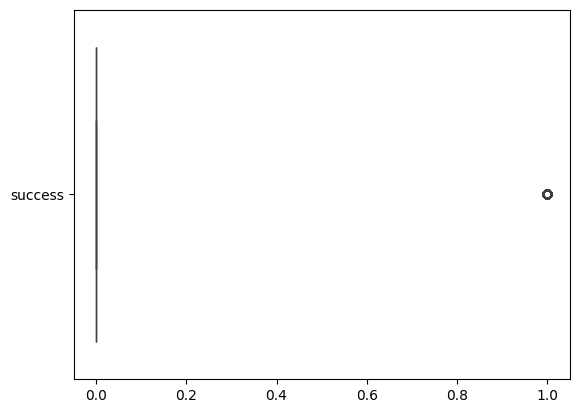

In [45]:
for i in data.columns:
    if data[i].dtype != 'object':
        sns.boxplot(data=data[[i]], orient="h")
        plt.show()

In [46]:
#1 вариант с заменой на уникальное значение
data = data.fillna(-1000)

In [47]:
#for i in data.columns:
#    if data[i].dtype != 'object':
#        data[i] = data[i].fillna(data[i].median())

In [48]:
# Вариант с заменой на медиану
#for i in data.columns:
#    if data[i].dtype != 'object':
 #       data[(data[i] < (data[i].quantile(0.25) - 1.5*(data[i].quantile(0.75) - data[i].quantile(0.25)))) & (data[i] > (data[i].quantile(0.75) + 1.5*(data[i].quantile(0.75) - data[i].quantile(0.25))))][i] = data[i].median()

In [51]:
def replace(row):
    class_dictionary = {"yes": 1, "no": 0}
    return class_dictionary[row]

In [52]:
data['y'] = data['y'].map(replace)

In [53]:
from sklearn.preprocessing import PolynomialFeatures
X = data.drop('y', axis = 1)
y = data['y']
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[1.000e+00, 3.000e+01, 1.787e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 3.300e+01, 4.789e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 3.500e+01, 1.350e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.000e+00, 5.700e+01, 2.950e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 2.800e+01, 1.137e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 4.400e+01, 1.136e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

In [54]:
X

,age,balance,day,duration,campaign,pdays,previous,admin.,blue-collar,entrepreneur,...,jul,jun,mar,may,nov,oct,sep,failure,other,success
0,30,1787,19,79,1,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,33,4789,11,220,1,339,4,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,35,1350,16,185,1,330,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,30,1476,3,199,4,-1,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,59,0,5,226,1,-1,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4517,57,-3313,9,153,1,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4518,57,295,19,151,11,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4519,28,1137,6,129,4,211,3,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from yellowbrick.model_selection import LearningCurve
import numpy as np

In [57]:
def compare_models(models, X_train, X_test, y_train, y_test):
    for model in models:
        model = model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f"------------------------------------------------------------------------------------------------")
        print(f"------------------------------------------------------------------------------------------------")
        print(f"------------------------------------------------------------------------------------------------")
        visualizer = LearningCurve(model, scoring='f1_macro', train_sizes=np.linspace(0.7, 1.0, 10)).fit(X_train, y_train).show()
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
        plt.show()
        try:
            importances = pd.DataFrame(data={'Attribute': X_train.columns,'Importance': model.feature_importances_})
            importances = importances.sort_values(by='Importance', ascending=False)
            plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
            plt.title('Значимость признаков: '+str(model), size=20)
            plt.xticks(rotation='vertical')
            plt.show()
        except:
            importances = pd.DataFrame(data={'Attribute': X_train.columns, 'Importance': model.coef_[0]})
            importances = importances.sort_values(by='Importance', ascending=False)
            plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
            plt.title('Значимость признаков: '+str(model), size=20)
            plt.xticks(rotation='vertical')
            plt.show()
        print(f"MODEL: {str(model)}")
        print(f"ClREP: {classification_report(y_test, y_pred)}")
        print(f"CVS:   {cross_val_score(model, X_train, y_train, cv=5)}")
        print(f"Переобучение: {f1_score(y_train, model.predict(X_train), average='macro')} на {f1_score(y_test, y_pred, average='macro')}")
        print(f"------------------------------------------------------------------------------------------------")
        print(f"------------------------------------------------------------------------------------------------")
        print(f"------------------------------------------------------------------------------------------------")
models = [GradientBoostingClassifier(), RandomForestClassifier(), LogisticRegression()]

------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------


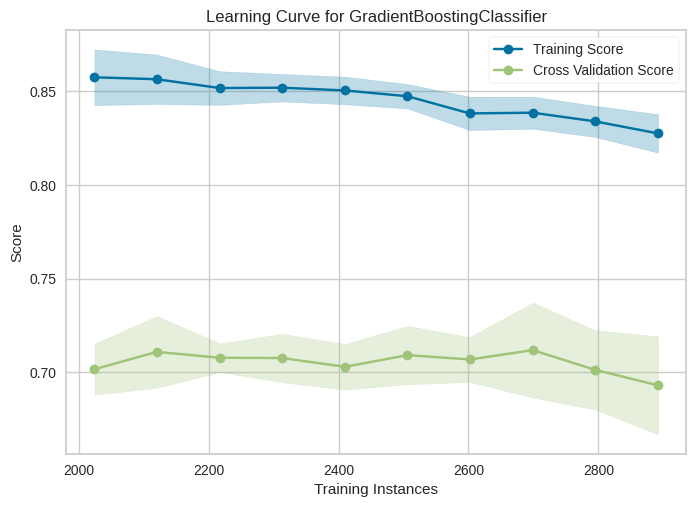

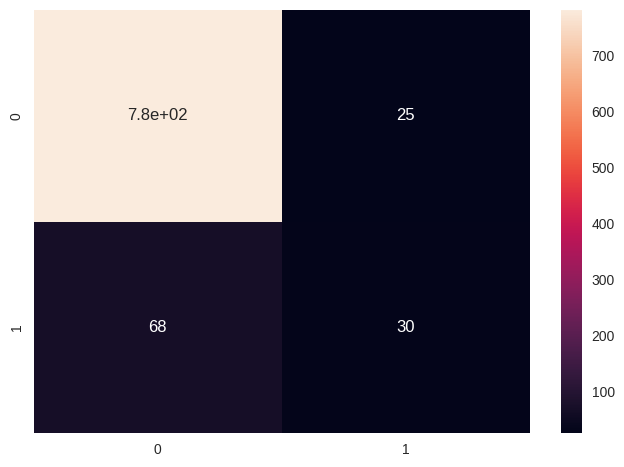

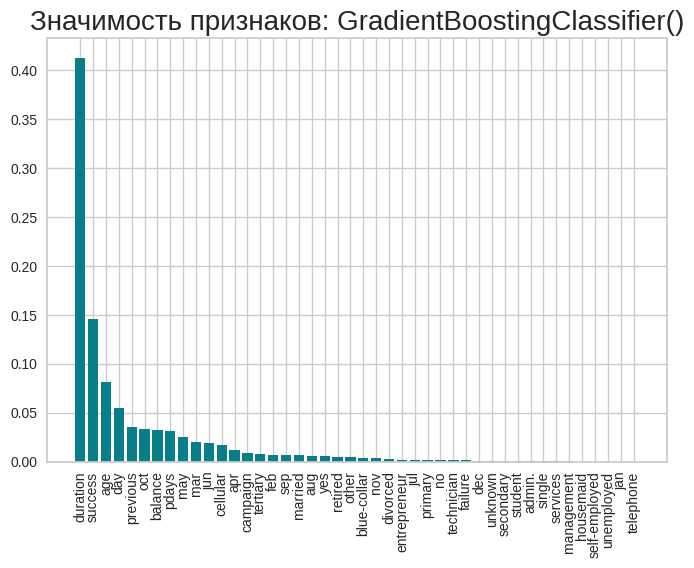

MODEL: GradientBoostingClassifier()
ClREP:               precision    recall  f1-score   support

           0       0.92      0.97      0.94       807
           1       0.55      0.31      0.39        98

    accuracy                           0.90       905
   macro avg       0.73      0.64      0.67       905
weighted avg       0.88      0.90      0.88       905

CVS:   [0.89917127 0.9142462  0.89764869 0.8879668  0.89349931]
Переобучение: 0.8213789780005907 на 0.668015667341167
------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
---------------------------

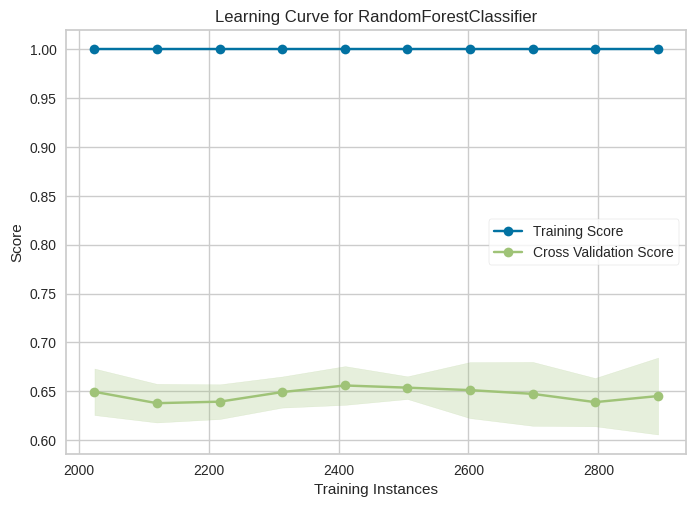

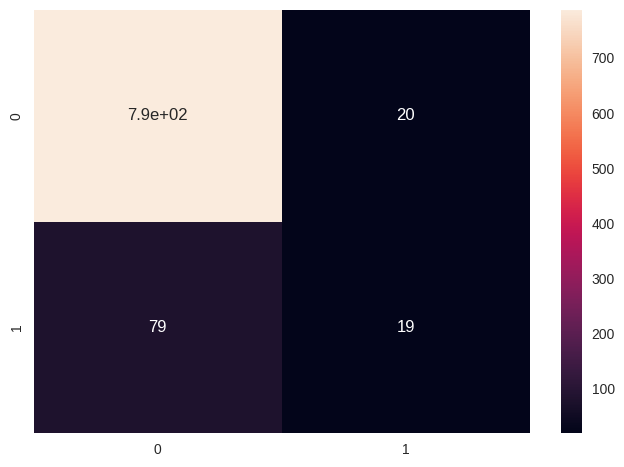

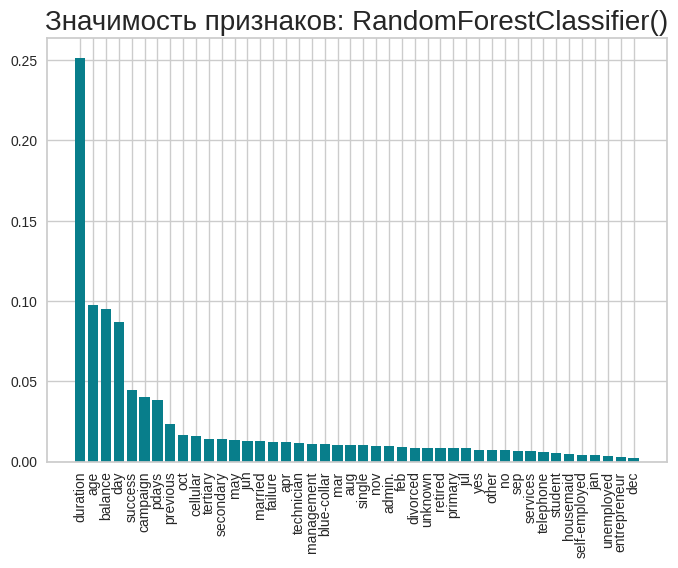

MODEL: RandomForestClassifier()
ClREP:               precision    recall  f1-score   support

           0       0.91      0.98      0.94       807
           1       0.49      0.19      0.28        98

    accuracy                           0.89       905
   macro avg       0.70      0.58      0.61       905
weighted avg       0.86      0.89      0.87       905

CVS:   [0.89779006 0.90318119 0.89211618 0.88381743 0.89488243]
Переобучение: 1.0 на 0.6090985641423903
------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
---------------------------------------------

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

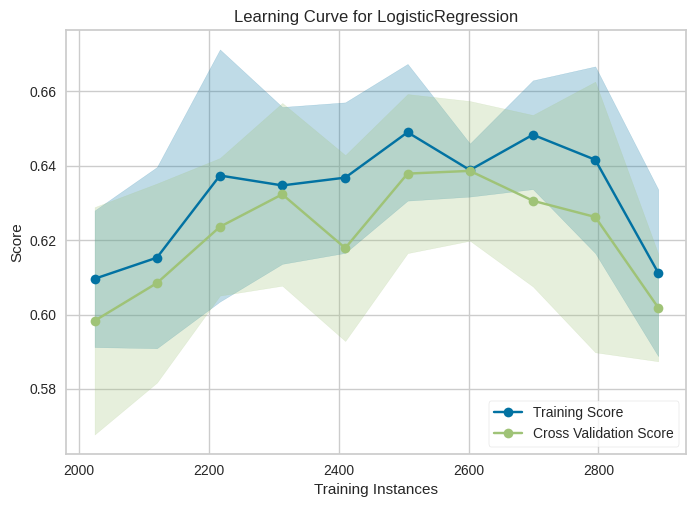

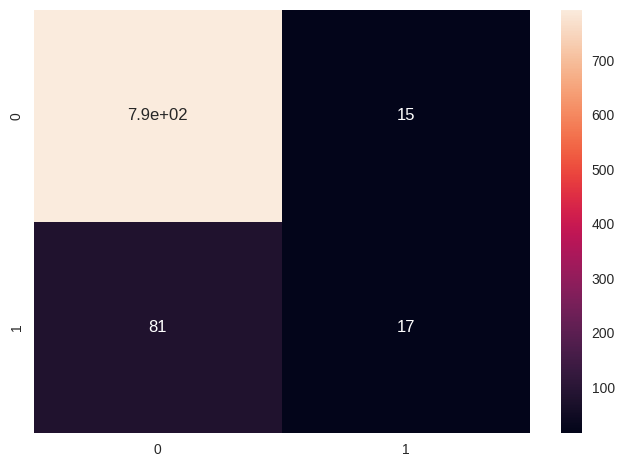

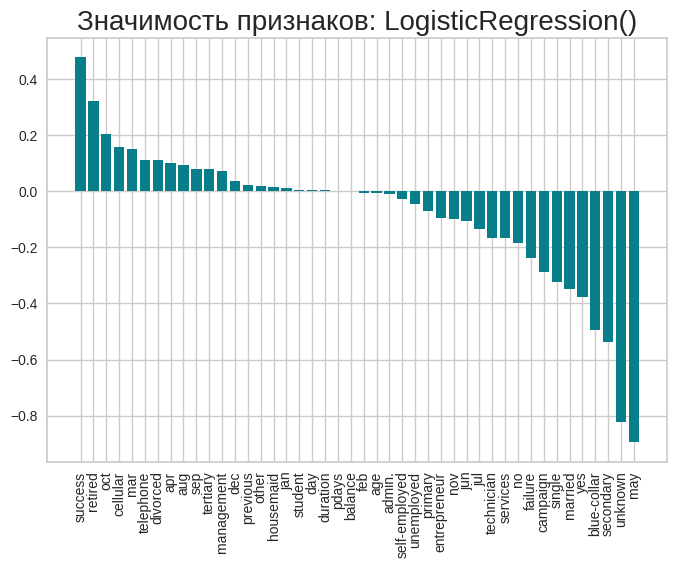

MODEL: LogisticRegression()
ClREP:               precision    recall  f1-score   support

           0       0.91      0.98      0.94       807
           1       0.53      0.17      0.26        98

    accuracy                           0.89       905
   macro avg       0.72      0.58      0.60       905
weighted avg       0.87      0.89      0.87       905



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

CVS:   [0.88535912 0.89488243 0.8769018  0.89073306 0.88658368]
Переобучение: 0.6192421090250035 на 0.6021978021978022
------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [58]:
compare_models(models, X_train, X_test, y_train, y_test)

In [59]:
gs = GridSearchCV(estimator=RandomForestClassifier(),param_grid={'n_estimators': [100, 80, 120], 'criterion': ['gini', 'entropy', 'log_loss']})
gs.fit(X_train, y_train)
print(gs.best_params_)
pd.DataFrame(gs.cv_results_).sort_values(['rank_test_score'], ascending=[True])

{'criterion': 'entropy', 'n_estimators': 80}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.376805,0.009879,0.016430,0.001601,entropy,80,"{'criterion': 'entropy', 'n_estimators': 80}",0.899171,0.905947,0.885201,0.887967,0.901798,0.896017,0.008047,1
3,0.483586,0.005914,0.019176,0.000550,entropy,100,"{'criterion': 'entropy', 'n_estimators': 100}",0.900552,0.907331,0.887967,0.882434,0.901798,0.896016,0.009287,2
1,0.486275,0.098304,0.019004,0.003277,gini,80,"{'criterion': 'gini', 'n_estimators': 80}",0.904696,0.908714,0.887967,0.881051,0.897649,0.896015,0.010276,3
5,0.682111,0.146985,0.025503,0.004323,entropy,120,"{'criterion': 'entropy', 'n_estimators': 120}",0.901934,0.905947,0.890733,0.887967,0.890733,0.895463,0.007110,4
0,0.529948,0.102481,0.022675,0.004642,gini,100,"{'criterion': 'gini', 'n_estimators': 100}",0.895028,0.908714,0.889350,0.886584,0.896266,0.895188,0.007645,5
8,0.562394,0.006288,0.022787,0.001756,log_loss,120,"{'criterion': 'log_loss', 'n_estimators': 120}",0.895028,0.901798,0.889350,0.886584,0.899032,0.894358,0.005713,6
6,0.527400,0.098968,0.022745,0.007841,log_loss,100,"{'criterion': 'log_loss', 'n_estimators': 100}",0.899171,0.905947,0.887967,0.881051,0.896266,0.894080,0.008702,7
2,0.560635,0.014706,0.025527,0.005908,gini,120,"{'criterion': 'gini', 'n_estimators': 120}",0.893646,0.904564,0.886584,0.887967,0.887967,0.892146,0.006668,8
7,0.383960,0.006016,0.015428,0.000175,log_loss,80,"{'criterion': 'log_loss', 'n_estimators': 80}",0.900552,0.903181,0.883817,0.881051,0.890733,0.891867,0.008792,9


In [60]:
model = RandomForestClassifier(criterion='log_loss', n_estimators=120)
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       807
           1       0.67      0.20      0.31        98

    accuracy                           0.90       905
   macro avg       0.79      0.60      0.63       905
weighted avg       0.88      0.90      0.88       905

